<a href="https://colab.research.google.com/github/NOORAHMED3676/My_projects/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
sudalairajkumar_novel_corona_virus_2019_dataset_path = kagglehub.dataset_download('sudalairajkumar/novel-corona-virus-2019-dataset')

print('Data source import complete.')


Data source import complete.


### COVID-19 Novel Coronavirus: EDA & Forecast Number of Cases

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.graph_objects as go
from prophet import Prophet
import pycountry
import plotly.express as px
from collections import namedtuple

In [3]:
%pip install pycountry

### Data Import, Preprocessing and EDA

In [4]:
df = pd.read_csv(f'{sudalairajkumar_novel_corona_virus_2019_dataset_path}/covid_19_data.csv',parse_dates=['Last Update'])
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)

df_confirmed = pd.read_csv(f"{sudalairajkumar_novel_corona_virus_2019_dataset_path}/time_series_covid_19_confirmed.csv")
df_recovered = pd.read_csv(f"{sudalairajkumar_novel_corona_virus_2019_dataset_path}/time_series_covid_19_recovered.csv")
df_deaths = pd.read_csv(f"{sudalairajkumar_novel_corona_virus_2019_dataset_path}/time_series_covid_19_deaths.csv")

df_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)
df_recovered.rename(columns={'Country/Region':'Country'}, inplace=True)
df_deaths.rename(columns={'Country/Region':'Country'}, inplace=True)

In [5]:
df_confirmed.head()

Province/State      Country       Lat       Long  1/22/20  1/23/20  1/24/20  \
0            NaN  Afghanistan  33.93911  67.709953        0        0        0   
1            NaN      Albania  41.15330  20.168300        0        0        0   
2            NaN      Algeria  28.03390   1.659600        0        0        0   
3            NaN      Andorra  42.50630   1.521800        0        0        0   
4            NaN       Angola -11.20270  17.873900        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  5/20/21  5/21/21  5/22/21  5/23/21  \
0        0        0        0  ...    64575    65080    65486    65728   
1        0        0        0  ...   132118   132153   132176   132209   
2        0        0        0  ...   126156   126434   126651   126860   
3        0        0        0  ...    13569    13569    13569    13569   
4        0        0        0  ...    31661    31909    32149    32441   

   5/24/21  5/25/21  5/26/21  5/27/21  5/28/21  5/29/21  
0    66275    66903    67743    68366    69130    70111  
1   132215   132229   132244   132264   132285   132297  
2   127107   127361   127646   127926   128198   128456  
3    13569    13664    13671    13682    13693    13693  
4    32623    32933    33338    33607    33944    34180  

[5 rows x 498 columns]

### Earliest Cases

In [6]:
df.head()

SNo        Date Province/State         Country      Last Update  Confirmed  \
0    1  01/22/2020          Anhui  Mainland China  1/22/2020 17:00        1.0   
1    2  01/22/2020        Beijing  Mainland China  1/22/2020 17:00       14.0   
2    3  01/22/2020      Chongqing  Mainland China  1/22/2020 17:00        6.0   
3    4  01/22/2020         Fujian  Mainland China  1/22/2020 17:00        1.0   
4    5  01/22/2020          Gansu  Mainland China  1/22/2020 17:00        0.0   

   Deaths  Recovered  
0     0.0        0.0  
1     0.0        0.0  
2     0.0        0.0  
3     0.0        0.0  
4     0.0        0.0

### Latest Cases

In [7]:
df.tail()

SNo        Date     Province/State         Country  \
306424  306425  05/29/2021  Zaporizhia Oblast         Ukraine   
306425  306426  05/29/2021            Zeeland     Netherlands   
306426  306427  05/29/2021           Zhejiang  Mainland China   
306427  306428  05/29/2021    Zhytomyr Oblast         Ukraine   
306428  306429  05/29/2021       Zuid-Holland     Netherlands   

                Last Update  Confirmed  Deaths  Recovered  
306424  2021-05-30 04:20:55   102641.0  2335.0    95289.0  
306425  2021-05-30 04:20:55    29147.0   245.0        0.0  
306426  2021-05-30 04:20:55     1364.0     1.0     1324.0  
306427  2021-05-30 04:20:55    87550.0  1738.0    83790.0  
306428  2021-05-30 04:20:55   391559.0  4252.0        0.0

In [8]:
df2 = df.groupby(["Date", "Country", "Province/State"])[['SNo', 'Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

### By Country View (World)

In [9]:
df2

Date    Country                Province/State     SNo  \
0       01/01/2021  Australia  Australian Capital Territory  192681   
1       01/01/2021  Australia               New South Wales  192986   
2       01/01/2021  Australia            Northern Territory  193003   
3       01/01/2021  Australia                    Queensland  193058   
4       01/01/2021  Australia               South Australia  193119   
...            ...        ...                           ...     ...   
228316  12/31/2020    Ukraine              Vinnytsia Oblast  192432   
228317  12/31/2020    Ukraine                  Volyn Oblast  192438   
228318  12/31/2020    Ukraine            Zakarpattia Oblast  192461   
228319  12/31/2020    Ukraine             Zaporizhia Oblast  192462   
228320  12/31/2020    Ukraine               Zhytomyr Oblast  192465   

        Confirmed  Deaths  Recovered  
0           118.0     3.0      114.0  
1          4947.0    54.0        0.0  
2            75.0     0.0       71.0  
3          1255.0     6.0     1224.0  
4           580.0     4.0      566.0  
...           ...     ...        ...  
228316    22500.0   395.0    15237.0  
228317    33016.0   515.0    28605.0  
228318    28200.0   637.0    23526.0  
228319    54088.0   594.0    20530.0  
228320    39202.0   655.0    31998.0  

[228321 rows x 7 columns]

### By Country View (China)

In [10]:
df.query('Country=="Mainland China"').groupby("Last Update")[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

Last Update  Confirmed   Deaths  Recovered
0        1/22/2020 17:00      547.0     17.0       28.0
1          1/23/20 17:00     1082.0     34.0       58.0
2          1/24/20 17:00      916.0     26.0       36.0
3          1/25/20 17:00     1399.0     42.0       39.0
4          1/26/20 16:00     2062.0     56.0       49.0
..                   ...        ...      ...        ...
880  2021-05-30 04:20:55    91072.0   4636.0    86117.0
881          3/8/20 5:31   325383.0  13160.0   298462.0
882          4/2/20 8:53    81589.0   3318.0    76408.0
883          4/4/20 9:38    81638.0   3326.0    76763.0
884          4/6/20 9:37    81707.0   3331.0    77084.0

[885 rows x 4 columns]

### By Country (Sorted)

In [11]:
df.groupby("Country")[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

Country   Confirmed    Deaths   Recovered
0                        Azerbaijan         1.0       0.0         0.0
1                   ('St. Martin',)         2.0       0.0         0.0
2                       Afghanistan  17026442.0  669075.0  13464399.0
3                           Albania  19768869.0  375955.0  13945256.0
4                           Algeria  27684358.0  834464.0  18959299.0
..                              ...         ...       ...         ...
224              West Bank and Gaza  41819444.0  440378.0  37003116.0
225                           Yemen    962066.0  237613.0    506523.0
226                          Zambia  13493953.0  205990.0  12625626.0
227                        Zimbabwe   6484581.0  237234.0   5594887.0
228  occupied Palestinian territory        25.0       0.0         0.0

[229 rows x 4 columns]

### Visualizations

In [12]:
df.groupby('Date').sum()

SNo                                     Province/State  \
Date                                                                       
01/01/2021  147143024  AbruzzoAcreAdygea RepublicAguascalientesAichiA...   
01/02/2021  147725193  AbruzzoAcreAdygea RepublicAguascalientesAichiA...   
01/03/2021  148502118  AbruzzoAcreAdygea RepublicAguascalientesAichiA...   
01/04/2021  149085814  AbruzzoAcreAdygea RepublicAguascalientesAichiA...   
01/05/2021  149669510  AbruzzoAcreAdygea RepublicAguascalientesAichiA...   
...               ...                                                ...   
12/27/2020  144232179  AbruzzoAcreAdygea RepublicAguascalientesAichiA...   
12/28/2020  144814348  AbruzzoAcreAdygea RepublicAguascalientesAichiA...   
12/29/2020  145396517  AbruzzoAcreAdygea RepublicAguascalientesAichiA...   
12/30/2020  145978686  AbruzzoAcreAdygea RepublicAguascalientesAichiA...   
12/31/2020  146560855  AbruzzoAcreAdygea RepublicAguascalientesAichiA...   

                                                      Country  \
Date                                                            
01/01/2021  AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...   
01/02/2021  AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...   
01/03/2021  AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...   
01/04/2021  AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...   
01/05/2021  AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...   
...                                                       ...   
12/27/2020  AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...   
12/28/2020  AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...   
12/29/2020  AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...   
12/30/2020  AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...   
12/31/2020  AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...   

                                                  Last Update   Confirmed  \
Date                                                                        
01/01/2021  2021-04-02 15:13:532021-04-02 15:13:532021-04-...  84092619.0   
01/02/2021  2021-04-02 15:13:532021-04-02 15:13:532021-04-...  84718978.0   
01/03/2021  2021-04-02 15:13:532021-04-02 15:13:532021-04-...  85251774.0   
01/04/2021  2021-04-02 15:13:532021-04-02 15:13:532021-04-...  85805892.0   
01/05/2021  2021-04-02 15:13:532021-04-02 15:13:532021-04-...  86546014.0   
...                                                       ...         ...   
12/27/2020  2021-04-02 15:13:532021-04-02 15:13:532021-04-...  80912611.0   
12/28/2020  2021-04-02 15:13:532021-04-02 15:13:532021-04-...  81408934.0   
12/29/2020  2021-04-02 15:13:532021-04-02 15:13:532021-04-...  82073362.0   
12/30/2020  2021-04-02 15:13:532021-04-02 15:13:532021-04-...  82834592.0   
12/31/2020  2021-04-02 15:13:532021-04-02 15:13:532021-04-...  83559601.0   

               Deaths   Recovered  
Date                               
01/01/2021  1834675.0  47313005.0  
01/02/2021  1843108.0  47614297.0  
01/03/2021  1850449.0  47882779.0  
01/04/2021  1860598.0  48173187.0  
01/05/2021  1875953.0  48488548.0  
...               ...         ...  
12/27/2020  1771659.0  45717710.0  
12/28/2020  1781415.0  46016136.0  
12/29/2020  1796786.0  46369231.0  
12/30/2020  1811843.0  46757476.0  
12/31/2020  1825012.0  47032627.0  

[494 rows x 7 columns]

### Summary Plot of Worldwide Cases - Confirmed, Deaths & Recovered

In [13]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [14]:
fig = go.Figure()
fig.add_trace(go.Bar(x=confirmed['Date'],
                y=confirmed['Confirmed'],
                name='Confirmed',
                marker_color='blue'
                ))
fig.add_trace(go.Bar(x=deaths['Date'],
                y=deaths['Deaths'],
                name='Deaths',
                marker_color='Red'
                ))
fig.add_trace(go.Bar(x=recovered['Date'],
                y=recovered['Recovered'],
                name='Recovered',
                marker_color='Green'
                ))

fig.update_layout(
    title='Worldwide Corona Virus Cases - Confirmed, Deaths, Recovered (Stacked Bar Chart)',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number of Cases',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='stack', # Change barmode to 'stack'
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.show()

In [15]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=confirmed['Date'],
                         y=confirmed['Confirmed'],
                         mode='lines+markers',
                         name='Confirmed',
                         line=dict(color='blue', width=2)
                        ))
fig.add_trace(go.Scatter(x=deaths['Date'],
                         y=deaths['Deaths'],
                         mode='lines+markers',
                         name='Deaths',
                         line=dict(color='Red', width=2)
                        ))
fig.add_trace(go.Scatter(x=recovered['Date'],
                         y=recovered['Recovered'],
                         mode='lines+markers',
                         name='Recovered',
                         line=dict(color='Green', width=2)
                        ))
fig.update_layout(
    title='Worldwide Corona Virus Cases - Confirmed, Deaths, Recovered (Line Chart)',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number of Cases',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    )
)
fig.show()

In [16]:
df_confirmed = df_confirmed[["Province/State","Lat","Long","Country"]]
df_temp = df.copy()
df_temp['Country'].replace({'Mainland China': 'China'}, inplace=True)
df_latlong = pd.merge(df_temp, df_confirmed, on=["Country", "Province/State"])

/tmp/ipython-input-3692134304.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [17]:
fig = px.density_mapbox(df_latlong,
                        lat="Lat",
                        lon="Long",
                        hover_name="Province/State",
                        hover_data=["Confirmed","Deaths","Recovered"],
                        animation_frame="Date",
                        color_continuous_scale="Portland",
                        radius=7,
                        zoom=0,height=700)
fig.update_layout(title='Worldwide Corona Virus Cases Time Lapse - Confirmed, Deaths, Recovered',
                  font=dict(family="Courier New, monospace",
                            size=18,
                            color="#7f7f7f")
                 )
fig.update_layout(mapbox_style="open-street-map", mapbox_center_lon=0)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})


fig.show()

### Analysis by Country
We use Plotly (https://plot.ly/python/bubble-maps/) for the visuals

#### Latest Date in Data

In [18]:
confirmed = df2.groupby(['Date', 'Country']).sum()[['Confirmed']].reset_index()
deaths = df2.groupby(['Date', 'Country']).sum()[['Deaths']].reset_index()
recovered = df2.groupby(['Date', 'Country']).sum()[['Recovered']].reset_index()

In [19]:
latest_date = confirmed['Date'].max()
latest_date

'12/31/2020'

In [20]:
confirmed = confirmed[(confirmed['Date']==latest_date)][['Country', 'Confirmed']]
deaths = deaths[(deaths['Date']==latest_date)][['Country', 'Deaths']]
recovered = recovered[(recovered['Date']==latest_date)][['Country', 'Recovered']]

### Countries/Regions Affected

In [21]:
all_countries = confirmed['Country'].unique()
print("Number of countries/regions with cases: " + str(len(all_countries)))
print("Countries/Regions with cases: ")
for i in all_countries:
    print("    " + str(i))

Number of countries/regions with cases: 25
Countries/Regions with cases: 
    Australia
    Belgium
    Brazil
    Canada
    Chile
    Colombia
    Denmark
    France
    Germany
    Hong Kong
    India
    Italy
    Japan
    Macau
    Mainland China
    Mexico
    Netherlands
    Pakistan
    Peru
    Russia
    Spain
    Sweden
    UK
    US
    Ukraine


We need to do some processing to the country names for this bubble plot as some of the countries are not found in pycountry.countries although they are, just that its due to them being listed acronyms and with additional words, such as Mainland China instead of China.

In [22]:
print(list(country.name for country in pycountry.countries))

['Aruba', 'Afghanistan', 'Angola', 'Anguilla', 'Åland Islands', 'Albania', 'Andorra', 'United Arab Emirates', 'Argentina', 'Armenia', 'American Samoa', 'Antarctica', 'French Southern Territories', 'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Bonaire, Sint Eustatius and Saba', 'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina', 'Saint Barthélemy', 'Belarus', 'Belize', 'Bermuda', 'Bolivia, Plurinational State of', 'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan', 'Bouvet Island', 'Botswana', 'Central African Republic', 'Canada', 'Cocos (Keeling) Islands', 'Switzerland', 'Chile', 'China', "Côte d'Ivoire", 'Cameroon', 'Congo, The Democratic Republic of the', 'Congo', 'Cook Islands', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica', 'Cuba', 'Curaçao', 'Christmas Island', 'Cayman Islands', 'Cyprus', 'Czechia', 'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'Algeria', 'Ecuador', 'Egy

In [23]:
print('UK' in list(country.name for country in pycountry.countries))
print('United Kingdom' in list(country.name for country in pycountry.countries))

False
True


In [24]:
confirmed2 = confirmed.copy()
deaths2 = deaths.copy()
recovered2 = recovered.copy()
bubble_plot_dfs = [confirmed2, deaths2, recovered2]
for df_ in bubble_plot_dfs:
    df_["Country"].replace({'Mainland China': 'China'}, inplace=True)
    df_["Country"].replace({'UK': 'United Kingdom'}, inplace=True)
    df_["Country"].replace({'US': 'United States'}, inplace=True)

/tmp/ipython-input-2853117316.py:6: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [25]:
countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3

confirmed2["iso_alpha"] = confirmed2["Country"].map(countries.get)
deaths2["iso_alpha"] = deaths2["Country"].map(countries.get)
recovered2["iso_alpha"] = recovered2["Country"].map(countries.get)

In [26]:
plot_data_confirmed = confirmed2[["iso_alpha","Confirmed", "Country"]]
plot_data_deaths = deaths2[["iso_alpha","Deaths"]]
plot_data_recovered = recovered2[["iso_alpha","Recovered"]]

In [27]:
fig = px.scatter_geo(plot_data_confirmed, locations="iso_alpha", color="Country",
                     hover_name="iso_alpha", size="Confirmed",
                     projection="natural earth", title = 'Worldwide Confirmed Cases')
fig.show()

In [28]:
fig = px.scatter_geo(plot_data_deaths, locations="iso_alpha", color="Deaths",
                     hover_name="iso_alpha", size="Deaths",
                     projection="natural earth", title="Worldwide Death Cases")
fig.show()

In [29]:
fig = px.scatter_geo(plot_data_recovered, locations="iso_alpha", color="Recovered",
                     hover_name="iso_alpha", size="Recovered",
                     projection="natural earth", title="Worldwide Recovered Cases")
fig.show()

### Transforming Data for Forecasting

In [30]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [31]:
confirmed.columns = ['ds','y']
#confirmed['ds'] = confirmed['ds'].dt.date
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [32]:
confirmed.head()

ds           y
0 2021-01-01  84092619.0
1 2021-01-02  84718978.0
2 2021-01-03  85251774.0
3 2021-01-04  85805892.0
4 2021-01-05  86546014.0

# Forecasting Total Number of Cases Worldwide

## Prophet

We use Prophet, a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well. It is also an open source software released by Facebook’s Core Data Science team. It is available for download on CRAN and PyPI.

## Why Prophet?

Prophet is easy to customize and use, and to produce accurate forecasts which can be explained intuitively with supporting evidence such as forecast seasonality components. It allows the analyst to explain in an intuitive and convinving manner to higher management as to why the forecasts are as such, and the plausible underlying factors that contribute to its result. Furthermore, it is also open-source! :)

## References
- https://facebook.github.io/prophet/
- https://facebook.github.io/prophet/docs/
- https://github.com/facebook/prophet

## Forecasting Confirmed Cases Worldwide with Prophet (Baseline)

We perform a week's ahead forecast with Prophet, with 95% prediction intervals. Here, no tweaking of seasonality-related parameters and additional regressors are performed.

In [33]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=7)
future_confirmed = future.copy() # for non-baseline predictions later on
future.tail()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp55zhhnns/_cgt3xo2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp55zhhnns/627gq8gm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10759', 'data', 'file=/tmp/tmp55zhhnns/_cgt3xo2.json', 'init=/tmp/tmp55zhhnns/627gq8gm.json', 'output', 'file=/tmp/tmp55zhhnns/prophet_modeltqsxbc7n/prophet_model-20250810191953.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:19:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:19:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


ds
496 2021-06-01
497 2021-06-02
498 2021-06-03
499 2021-06-04
500 2021-06-05

In [34]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
496 2021-06-01  1.706641e+08  1.685453e+08  1.724757e+08
497 2021-06-02  1.713250e+08  1.693132e+08  1.733010e+08
498 2021-06-03  1.719982e+08  1.698756e+08  1.741054e+08
499 2021-06-04  1.726613e+08  1.706239e+08  1.746796e+08
500 2021-06-05  1.732804e+08  1.712033e+08  1.754164e+08

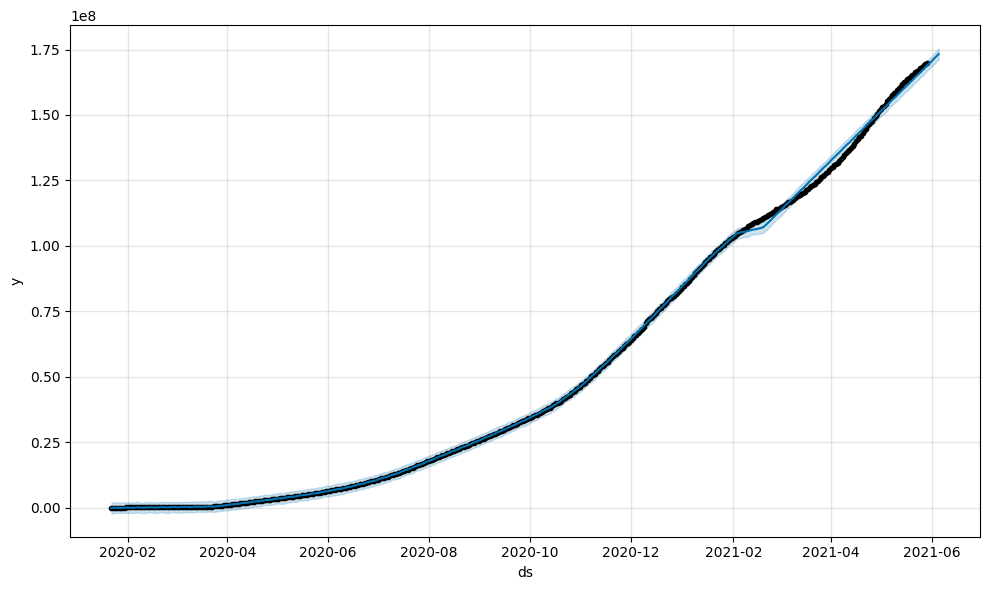

In [35]:
confirmed_forecast_plot = m.plot(forecast)

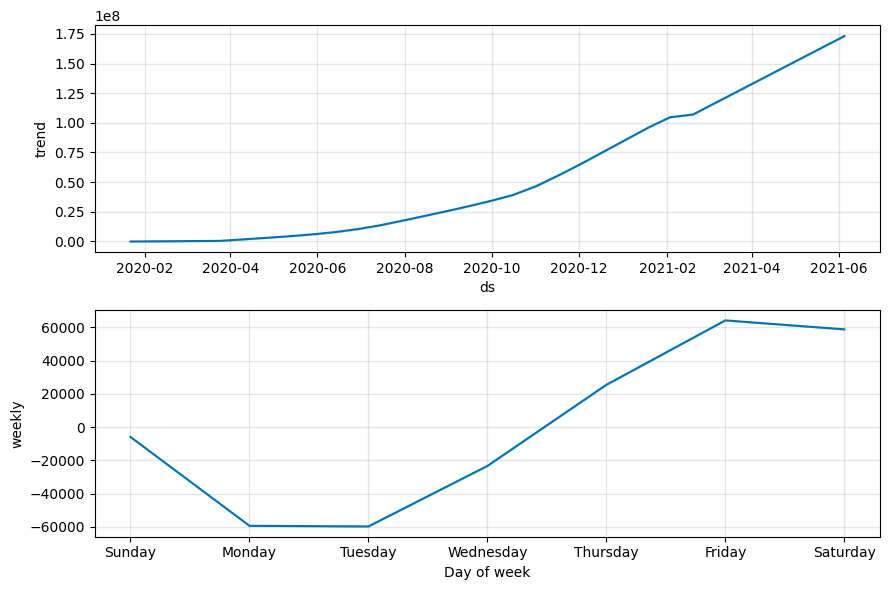

In [36]:
forecast_components = m.plot_components(forecast)

## Forecasting Deaths Worldwide with Prophet (Baseline)

We perform a week's ahead forecast with Prophet, with 95% prediction intervals. Here, no tweaking of seasonality-related parameters and additional regressors are performed.

In [37]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])

In [38]:
m = Prophet(interval_width=0.95)
m.fit(deaths)
future = m.make_future_dataframe(periods=7)
future_deaths = future.copy() # for non-baseline predictions later on
future.tail()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp55zhhnns/kd173m01.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp55zhhnns/2pxir0a8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23677', 'data', 'file=/tmp/tmp55zhhnns/kd173m01.json', 'init=/tmp/tmp55zhhnns/2pxir0a8.json', 'output', 'file=/tmp/tmp55zhhnns/prophet_modelplsgjjyj/prophet_model-20250810191955.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:19:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:19:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


ds
496 2021-06-01
497 2021-06-02
498 2021-06-03
499 2021-06-04
500 2021-06-05

In [39]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
496 2021-06-01  3.528683e+06  3.503609e+06  3.552263e+06
497 2021-06-02  3.540935e+06  3.516299e+06  3.567874e+06
498 2021-06-03  3.552924e+06  3.526179e+06  3.577474e+06
499 2021-06-04  3.564730e+06  3.539763e+06  3.589336e+06
500 2021-06-05  3.575258e+06  3.549507e+06  3.600835e+06

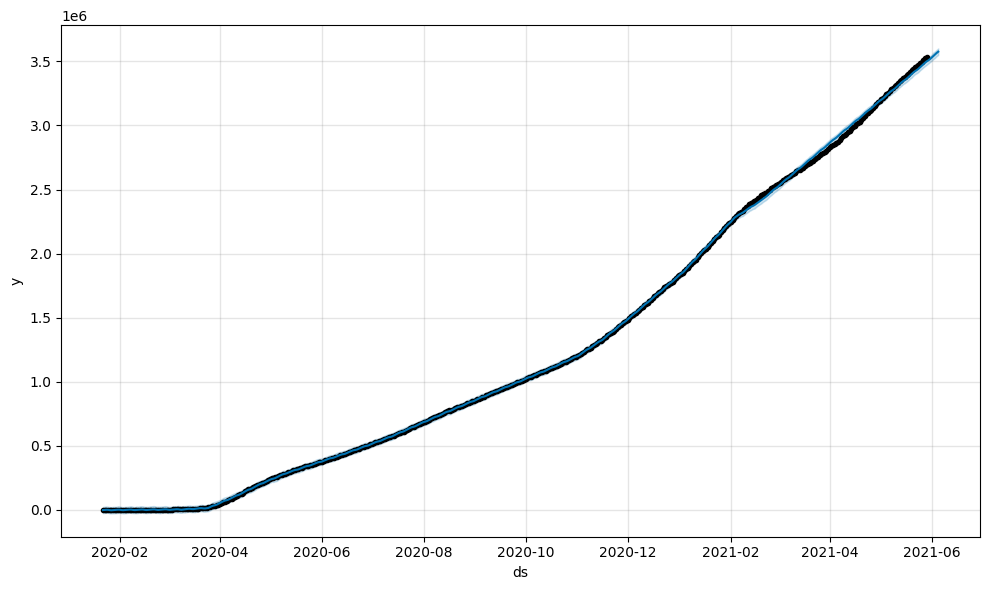

In [40]:
deaths_forecast_plot = m.plot(forecast)

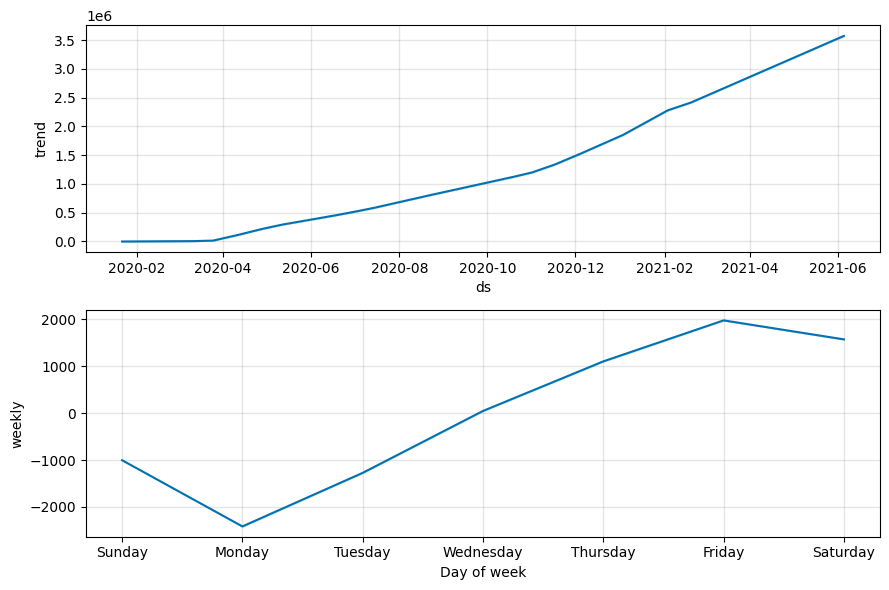

In [41]:
forecast_components = m.plot_components(forecast)

## Forecasting Recovered Cases Worldwide with Prophet (Baseline)

We perform a week's ahead forecast with Prophet, with 95% prediction intervals. Here, no tweaking of seasonality-related parameters and additional regressors are performed.

In [42]:
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])

In [43]:
m = Prophet(interval_width=0.95)
m.fit(recovered)
future = m.make_future_dataframe(periods=7)
future_recovered = future.copy() # for non-baseline predictions later on
future.tail()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp55zhhnns/0kveeevv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp55zhhnns/y5cx2m8m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39121', 'data', 'file=/tmp/tmp55zhhnns/0kveeevv.json', 'init=/tmp/tmp55zhhnns/y5cx2m8m.json', 'output', 'file=/tmp/tmp55zhhnns/prophet_modeln9hk9wnv/prophet_model-20250810191957.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:19:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:19:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


ds
496 2021-06-01
497 2021-06-02
498 2021-06-03
499 2021-06-04
500 2021-06-05

In [44]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
496 2021-06-01  1.030049e+08  1.001490e+08  1.057232e+08
497 2021-06-02  1.034696e+08  1.005517e+08  1.062842e+08
498 2021-06-03  1.039214e+08  1.010118e+08  1.068619e+08
499 2021-06-04  1.043637e+08  1.017133e+08  1.071935e+08
500 2021-06-05  1.048369e+08  1.019318e+08  1.074077e+08

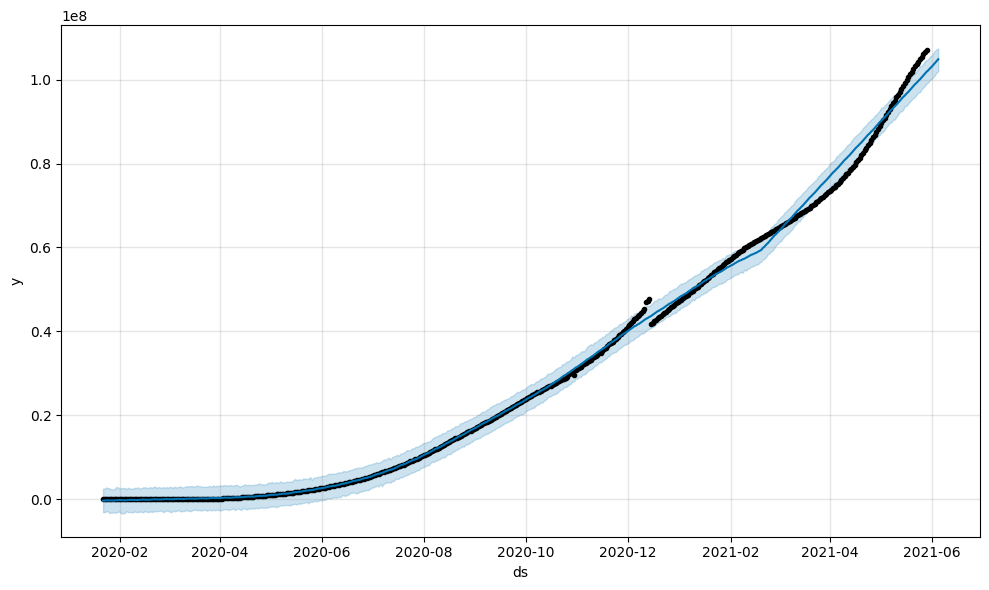

In [45]:
recovered_forecast_plot = m.plot(forecast)

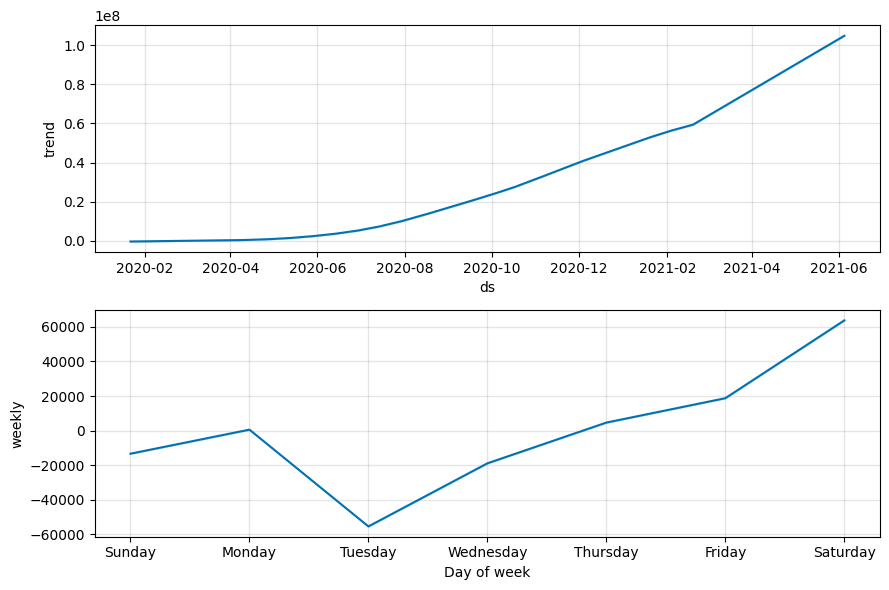

In [46]:
forecast_components = m.plot_components(forecast)

Seems pretty decent for a baseline Prophet model in the case of the number of recovered! :)

From the forecast component plots, it is clear that there exists an upward trend in the number of cases worldwide. In the weekly trends plot, interestingly, it is the **highest at the weekends**!

## With Baseline Prophet Model (Using Default Parameters), Prophet Model with Custom Seasonalities & Fourier Orders

### Data Preparation

As we are now forecasting at country and state/province level, for small values, it is possible for forecasts to become negative. To counter this, we round negative values to zero. To perform forecast evaluations using mean absolute error (MAE), we require to partition the dataset into train & validation sets. Here, the test set will contain the dates for which the Prophet model is trained on and where forecasts were made.

In [47]:
days_to_forecast = 7 # changable
first_forecasted_date = sorted(list(set(df2['Date'].values)))[-days_to_forecast]

print('The first date to perform forecasts for is: ' + str(first_forecasted_date))

The first date to perform forecasts for is: 12/25/2020


In [48]:
confirmed_df = df2[['SNo', 'Date','Province/State', 'Country', 'Confirmed']]
confirmed_df

SNo        Date                Province/State    Country  Confirmed
0       192681  01/01/2021  Australian Capital Territory  Australia      118.0
1       192986  01/01/2021               New South Wales  Australia     4947.0
2       193003  01/01/2021            Northern Territory  Australia       75.0
3       193058  01/01/2021                    Queensland  Australia     1255.0
4       193119  01/01/2021               South Australia  Australia      580.0
...        ...         ...                           ...        ...        ...
228316  192432  12/31/2020              Vinnytsia Oblast    Ukraine    22500.0
228317  192438  12/31/2020                  Volyn Oblast    Ukraine    33016.0
228318  192461  12/31/2020            Zakarpattia Oblast    Ukraine    28200.0
228319  192462  12/31/2020             Zaporizhia Oblast    Ukraine    54088.0
228320  192465  12/31/2020               Zhytomyr Oblast    Ukraine    39202.0

[228321 rows x 5 columns]

In [49]:
deaths_df = df2[['SNo', 'Date','Province/State', 'Country', 'Deaths']]
deaths_df

SNo        Date                Province/State    Country  Deaths
0       192681  01/01/2021  Australian Capital Territory  Australia     3.0
1       192986  01/01/2021               New South Wales  Australia    54.0
2       193003  01/01/2021            Northern Territory  Australia     0.0
3       193058  01/01/2021                    Queensland  Australia     6.0
4       193119  01/01/2021               South Australia  Australia     4.0
...        ...         ...                           ...        ...     ...
228316  192432  12/31/2020              Vinnytsia Oblast    Ukraine   395.0
228317  192438  12/31/2020                  Volyn Oblast    Ukraine   515.0
228318  192461  12/31/2020            Zakarpattia Oblast    Ukraine   637.0
228319  192462  12/31/2020             Zaporizhia Oblast    Ukraine   594.0
228320  192465  12/31/2020               Zhytomyr Oblast    Ukraine   655.0

[228321 rows x 5 columns]

In [50]:
recovered_df = df2[['SNo', 'Date','Province/State', 'Country', 'Recovered']]
recovered_df

SNo        Date                Province/State    Country  Recovered
0       192681  01/01/2021  Australian Capital Territory  Australia      114.0
1       192986  01/01/2021               New South Wales  Australia        0.0
2       193003  01/01/2021            Northern Territory  Australia       71.0
3       193058  01/01/2021                    Queensland  Australia     1224.0
4       193119  01/01/2021               South Australia  Australia      566.0
...        ...         ...                           ...        ...        ...
228316  192432  12/31/2020              Vinnytsia Oblast    Ukraine    15237.0
228317  192438  12/31/2020                  Volyn Oblast    Ukraine    28605.0
228318  192461  12/31/2020            Zakarpattia Oblast    Ukraine    23526.0
228319  192462  12/31/2020             Zaporizhia Oblast    Ukraine    20530.0
228320  192465  12/31/2020               Zhytomyr Oblast    Ukraine    31998.0

[228321 rows x 5 columns]

### Forecasting Confirmed Cases, Deaths & Recovered Cases and Computing Mean Absolute Error (MAE)

Next, we perform predictions for each country and state. Note that we compute MAE with the raw predictions before rounding.

In [51]:
def make_forecasts(all_countries, confirmed_df, deaths_df, recovered_df, days_to_forecast, first_forecasted_date, mode):
    forecast_dfs = []
    absolute_errors = [] # collate absolute errors so that we can find MAE later on
    counter = 0 # arbitrary counter to output snippet of result_val_df only once, when it is 1
    for country in all_countries:
        try:
            assert(country in confirmed_df['Country'].values)
            print('Country ' + str(country) + ' is listed! ')
            country_confirmed_df = confirmed_df[(confirmed_df['Country'] == country)]
            country_deaths_df = deaths_df[(deaths_df['Country'] == country)]
            country_recovered_df = recovered_df[(recovered_df['Country'] == country)]
            country_dfs = [('Confirmed', country_confirmed_df),
                           ('Deaths', country_deaths_df),
                           ('Recovered', country_recovered_df)]
            states_in_country = country_confirmed_df['Province/State'].unique()
            for state in states_in_country:
                try:
                    state_dfs = [] # to store forecasts for Confirmed, Deaths and Recovered

                    assert(state in country_confirmed_df['Province/State'].values)

                    # make forecasts for each case type (Confirmed, Deaths, Recovered)
                    for country_df_tup in country_dfs:
                        case_type = country_df_tup[0]
                        country_df = country_df_tup[1]
                        state_df = country_df[(country_df['Province/State'] == state)]

                        # data preparation for forecast with Prophet at state level
                        state_df = state_df[['Date', case_type]]
                        state_df.columns = ['ds','y']
                        state_df['ds'] = pd.to_datetime(state_df['ds'])

                        state_df_val = state_df[(state_df['ds'] >= pd.to_datetime(first_forecasted_date))] # validation set
                        state_df = state_df[(state_df['ds'] < pd.to_datetime(first_forecasted_date))] # train set

                        if mode == 'default':
                            m = Prophet()
                        elif mode == 'custom':
                            m = Prophet(daily_seasonality=False, weekly_seasonality=False, yearly_seasonality=False)
                            m.add_seasonality(name='monthly', period=30.5, fourier_order=10)
                            m.add_seasonality(name='weekly', period=7, fourier_order=21)
                            m.add_seasonality(name='daily', period=1, fourier_order=3)
                        m.fit(state_df)
                        future = m.make_future_dataframe(periods=days_to_forecast)
                        forecast = m.predict(future)

                        # evaluate forecasts with validation set and save absolute errors to absolute_errors
                        forecast_df = forecast[['ds', 'yhat']]
                        result_df = forecast_df[(forecast_df['ds'] >= pd.to_datetime(first_forecasted_date))]
                        result_val_df = result_df.merge(state_df_val, on=['ds'])
                        result_val_df['abs_diff'] = (result_val_df['y'] - result_val_df['yhat']).abs()
                        absolute_errors += list(result_val_df['abs_diff'].values)

                        # the following allows the user to check the output at particular checkpoints. Feel free to change!
                        if counter == 1:
                            print('Printing snippet of result_val_df: \n')
                            print(result_val_df)
                            print(absolute_errors)
                        counter += 1

                        # save results to dataframe
                        forecast_df['Province/State'] = state
                        forecast_df['Country/Region'] = country
                        forecast_df.rename(columns={'yhat':case_type}, inplace=True)
                        state_dfs += [forecast_df.tail(days_to_forecast)]

                    merged_df = state_dfs[0].merge(state_dfs[1],on=['ds', 'Province/State', 'Country/Region']).merge(state_dfs[2],on=['ds', 'Province/State', 'Country/Region'])
                    forecast_dfs += [merged_df]
                except:
                    continue
        except:
            print('Country ' + str(country) + ' is not listed! ')
            continue
    results_tup = namedtuple('results_tup', ['forecast_dfs', 'absolute_errors'])
    return results_tup(forecast_dfs, absolute_errors)

In [ ]:
forecast_results = make_forecasts(all_countries, confirmed_df, deaths_df, recovered_df, days_to_forecast, first_forecasted_date, 'default')
absolute_errors = forecast_results.absolute_errors

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp55zhhnns/lngjm2pi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp55zhhnns/my_z550h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23996', 'data', 'file=/tmp/tmp55zhhnns/lngjm2pi.json', 'init=/tmp/tmp55zhhnns/my_z550h.json', 'output', 'file=/tmp/tmp55zhhnns/prophet_modelf2ywydao/prophet_model-20250810192000.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:20:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Country Australia is listed! 


19:20:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-3744576759.py:62: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-3744576759.py:63: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-3744576759.py:64: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

Printing snippet of result_val_df: 

          ds      yhat    y  abs_diff
0 2020-12-25  2.979798  3.0  0.020202
1 2020-12-26  2.991199  3.0  0.008801
2 2020-12-27  2.979156  3.0  0.020844
3 2020-12-28  2.991298  3.0  0.008702
4 2020-12-29  2.979255  3.0  0.020745
5 2020-12-30  2.992255  3.0  0.007745
6 2020-12-31  2.981054  3.0  0.018946
[np.float64(0.3949856187922194), np.float64(0.42259380967831817), np.float64(0.34775658541292387), np.float64(0.39462190474890235), np.float64(0.46587787195228714), np.float64(0.5984654560220406), np.float64(0.4383930641005662), np.float64(0.02020205093668226), np.float64(0.00880141461055306), np.float64(0.0208444696827379), np.float64(0.008702099164205723), np.float64(0.020744563100608016), np.float64(0.007744668300999624), np.float64(0.01894592518539584)]


DEBUG:cmdstanpy:input tempfile: /tmp/tmp55zhhnns/9vwbl3d4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94216', 'data', 'file=/tmp/tmp55zhhnns/68rauwaf.json', 'init=/tmp/tmp55zhhnns/9vwbl3d4.json', 'output', 'file=/tmp/tmp55zhhnns/prophet_model4ktibyjn/prophet_model-20250810192001.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:20:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:20:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-3744576759.py:62: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

Country Belgium is listed! 


19:20:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-3744576759.py:62: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-3744576759.py:63: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-3744576759.py:64: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

Country Brazil is listed! 


/tmp/ipython-input-3744576759.py:62: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-3744576759.py:63: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-3744576759.py:64: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonali

In [ ]:
forecast_results.forecast_dfs[0].tail(days_to_forecast) # example of a forecast

### Some Final Touch-ups..

In [ ]:
forecasts_final = pd.concat(forecast_results.forecast_dfs, axis=0)
forecasts_final.sort_values(by='ds')
forecasts_final = forecasts_final[['ds', 'Province/State', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered']]
forecasts_final.rename(columns={'ds':'ObservationDate'}, inplace=True)
for case_type in ['Confirmed', 'Deaths', 'Recovered']:
    forecasts_final[case_type] = forecasts_final[case_type].round() # round forecasts to integer as humans cannot be floats
    forecasts_final[forecasts_final[case_type] < 0] = 0 # replace negative forecasts to zero

forecasts_final

In [ ]:
forecasts_final.to_csv("forecasts_default_prophet.csv", index=False) # save forecasts to CSV

## Prophet with Daily & Weekly Seasonality (with custom Fourier orders)

Prophet will by default fit weekly and yearly seasonalities, if the time series is more than two cycles long. It will also fit daily seasonality for a sub-daily time series. You can add other seasonalities (monthly, quarterly, hourly) using the add_seasonality method (Python) or function (R).

The inputs to this function are a name, the period of the seasonality in days, and the Fourier order for the seasonality. For reference, by default Prophet uses a Fourier order of 3 for weekly seasonality and 10 for yearly seasonality. An optional input to add_seasonality is the prior scale for that seasonal component - this is discussed below.

**Source:** https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html#fourier-order-for-seasonalities

In [ ]:
forecast_results_custom = make_forecasts(all_countries, confirmed_df, deaths_df, recovered_df, days_to_forecast, first_forecasted_date, 'custom')
absolute_errors_custom = forecast_results_custom.absolute_errors
forecast_dfs_custom = forecast_results_custom.forecast_dfs

In [ ]:
forecasts_final_custom = pd.concat(forecast_dfs_custom, axis=0)
forecasts_final_custom.sort_values(by='ds')
forecasts_final_custom = forecasts_final_custom[['ds', 'Province/State', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered']]
forecasts_final_custom.rename(columns={'ds':'ObservationDate'}, inplace=True)
for case_type in ['Confirmed', 'Deaths', 'Recovered']:
    forecasts_final_custom[case_type] = forecasts_final_custom[case_type].round() # round forecasts to integer as humans cannot be floats
    forecasts_final_custom[forecasts_final_custom[case_type] < 0] = 0 # replace negative forecasts to zero

forecasts_final_custom

In [ ]:
forecasts_final_custom.to_csv("forecasts_custom_prophet.csv", index=False) # save forecasts to CSV

# Evaluation of Forecasts (Mean Absolute Error)

In [ ]:
N = len(absolute_errors)
mean_absolute_error = sum(absolute_errors)/N
print('The mean absolute error for ' + str(days_to_forecast) + ' days of forecasts with the default Prophet model is: ' + str(round(mean_absolute_error, 2))) # round to 2 decimal places

In [ ]:
mean_absolute_error_custom = sum(absolute_errors_custom)/N
print('The mean absolute error for ' + str(days_to_forecast) + ' days of forecasts with the custom Prophet model is: ' + str(round(mean_absolute_error_custom, 2))) # round to 2 decimal places

## This kernel will be periodically updated, with refresh in visualizations and forecasts (with new models)